In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

In [2]:
#load the file and set the first column as the index
df = pd.read_excel(r"C:\Users\piush\Desktop\Dataset\Assignment_2\House_Prices.xlsx")
df = df.set_index('home')

#### EDA

In [4]:
print ("\n\n---------------------")
print ("DATA SET INFORMATION")
print ("---------------------")
print ("Shape of data set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)



---------------------
DATA SET INFORMATION
---------------------
Shape of data set: (128, 7) 

Column Headers: ['nbhd', 'offers', 'sqft', 'brick', 'bedrooms', 'bathrooms', 'price'] 

nbhd         object
offers        int64
sqft          int64
brick        object
bedrooms      int64
bathrooms     int64
price         int64
dtype: object


###### Metadata							
1. sqrt	: the size of the house in square feet			(Independent Variable---x)			
2. nbhd	: categorical variable indicating which of the 3 neighbourhoods the house is in						
3. brick	: categorical variable indicating whether the hsoue is made of brick						
4. offers	: offers on the property						
5. bedrooms	: numerical variable indicating the number of bedrooms						
6. bathrooms	: numerical variable indicating the number of bathrooms						
7. price	: numerical variable indicating the asking price		(Dependent Variable---y)	

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/introductory-concepts/data-concepts/cat-quan-variable/

http://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/


In [5]:
import re
missing_values = []
nonumeric_values = []

print ("DATA SET INFORMATION")
print ("========================\n")

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

DATA SET INFORMATION

'nbhd' has 3 unique values
['nbhd02' 'nbhd01' 'nbhd03']

-----------------------------------------------------------------------

'offers' has 6 unique values
[2 3 1 4 5 6]

-----------------------------------------------------------------------

'sqft' has 61 unique values
~~Listing up to 10 unique values~~
[1790 2030 1740 1980 2130 1780 1830 2160 2110 1730]

-----------------------------------------------------------------------

'brick' has 2 unique values
['No' 'Yes']

-----------------------------------------------------------------------

'bedrooms' has 4 unique values
[2 4 3 5]

-----------------------------------------------------------------------

'bathrooms' has 3 unique values
[2 3 4]

-----------------------------------------------------------------------

'price' has 123 unique values
~~Listing up to 10 unique values~~
[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000]

------------------------------------------------------------

In [6]:
#get summary of numerical variables
df.describe()

,offers,sqft,bedrooms,bathrooms,price
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.578125,2000.937500,3.023438,2.445312,130427.343750
std,1.069324,211.572431,0.725951,0.514492,26868.770371
min,1.000000,1450.000000,2.000000,2.000000,69100.000000
25%,2.000000,1880.000000,3.000000,2.000000,111325.000000
50%,3.000000,2000.000000,3.000000,2.000000,125950.000000
75%,3.000000,2140.000000,3.000000,3.000000,148250.000000
max,6.000000,2590.000000,5.000000,4.000000,211200.000000


###### For the non-numerical values, we can look at frequency distribution to understand whether they make sense or not.

In [7]:
df['nbhd'].value_counts()

nbhd02    45
nbhd01    44
nbhd03    39
Name: nbhd, dtype: int64

In [8]:
df['brick'].value_counts()

No     86
Yes    42
Name: brick, dtype: int64

###### two dimensional table to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:¶

In [14]:
nbhd_brick_table = pd.crosstab(index=df["nbhd"], 
                          columns=df["brick"])
nbhd_brick_table

brick,No,Yes
nbhd,,
nbhd01,37,7
nbhd02,26,19
nbhd03,23,16


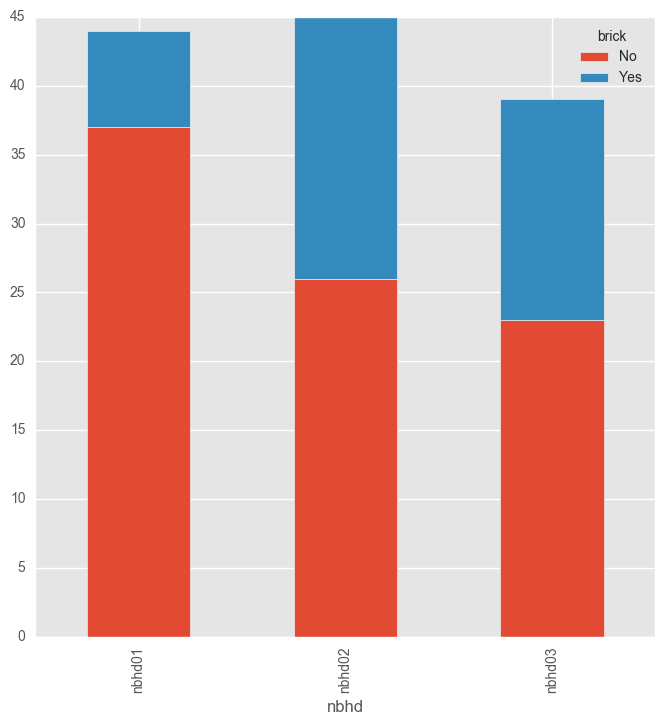

In [15]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)

nbhd_brick_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

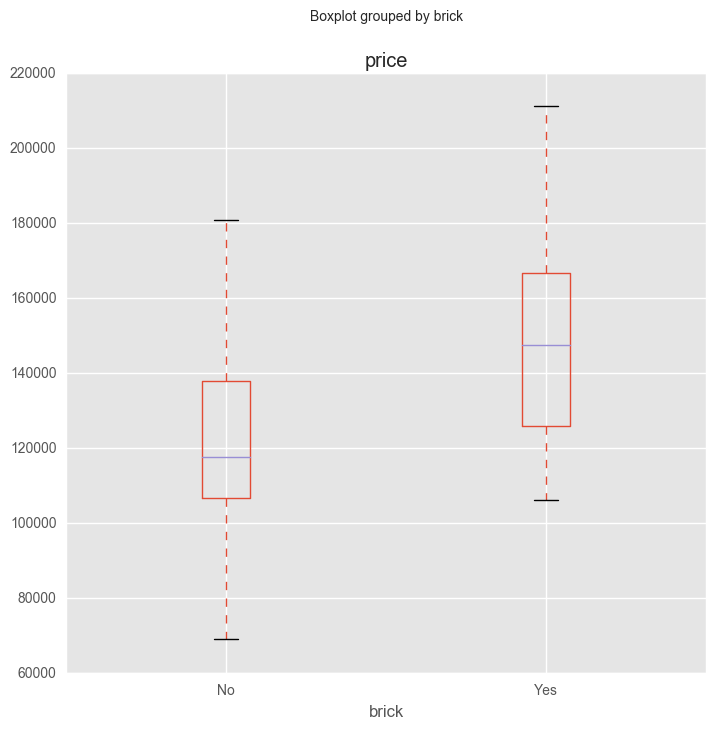

In [17]:
df.boxplot(column="price",        # Column to plot
                 by= "brick",         # Column to split upon
                 figsize= (8,8))        # Figure size

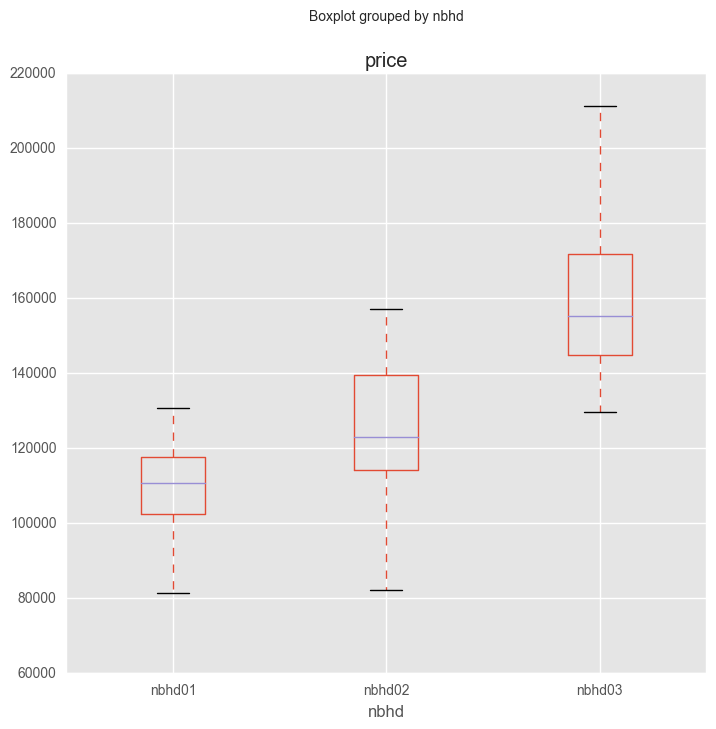

In [19]:
df.boxplot(column="price",        # Column to plot
                 by= "nbhd",         # Column to split upon
                 figsize= (8,8))        # Figure size

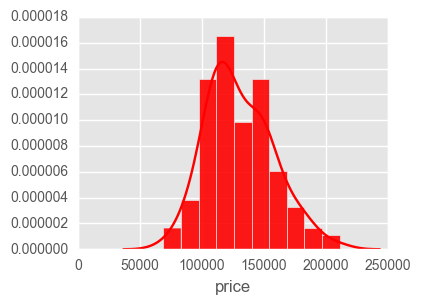

In [22]:
sns.distplot(df['price'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

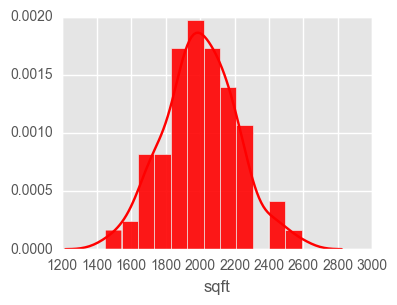

In [24]:
sns.distplot(df['sqft'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

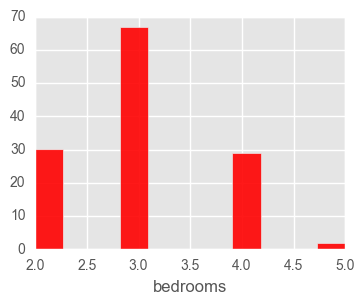

In [28]:
sns.distplot(df['bedrooms'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

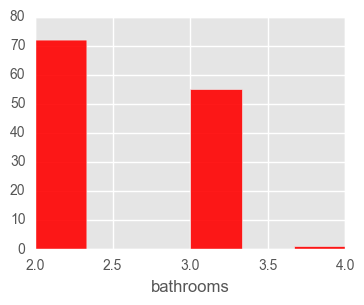

In [27]:
sns.distplot(df['bathrooms'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

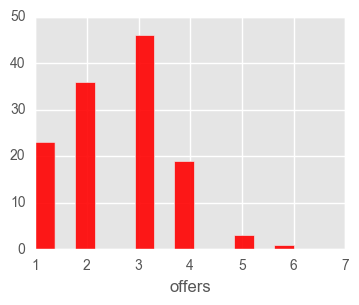

In [31]:
sns.distplot(df['offers'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

##### Bivariate Analysis

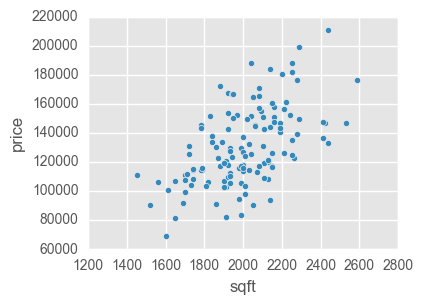

In [34]:
df.plot(kind="scatter",     # Create a scatterplot
              x="sqft",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

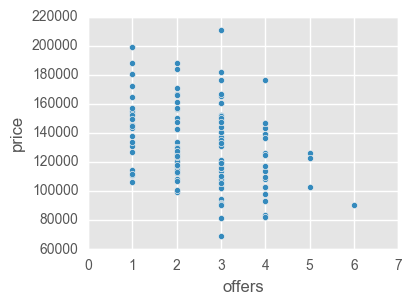

In [35]:
df.plot(kind="scatter",     # Create a scatterplot
              x="offers",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

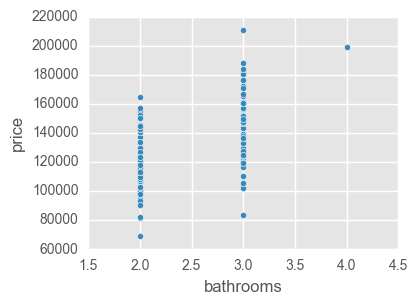

In [36]:
df.plot(kind="scatter",     # Create a scatterplot
              x="bathrooms",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

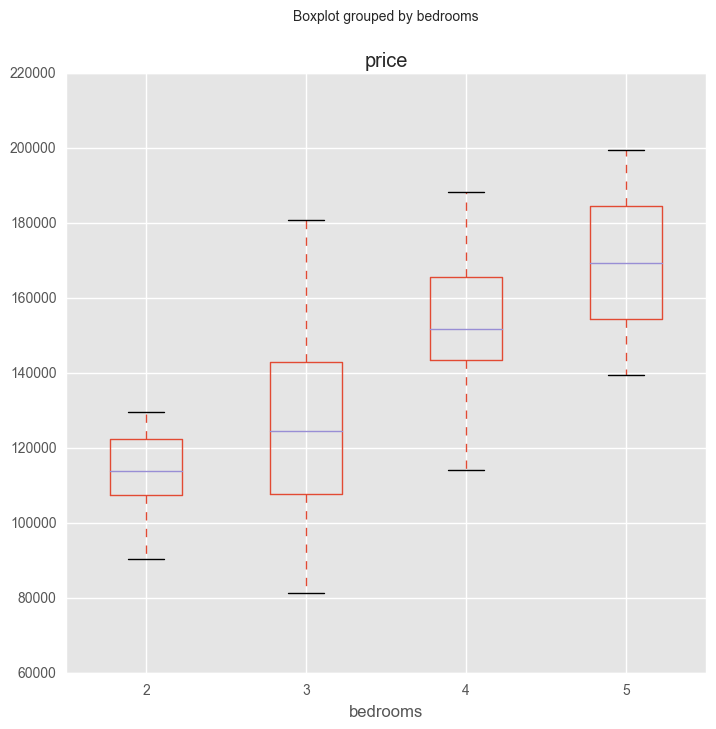

In [44]:
df.boxplot(column="price",        # Column to plot
                 by= "bedrooms",         # Column to split upon
                 figsize= (8,8))        # Figure size

#### Is the price associated with sqft

In [46]:
############################################################################################
# BASIC LINEAR REGRESSION
############################################################################################

Axes(0.125,0.125;0.775x0.775)


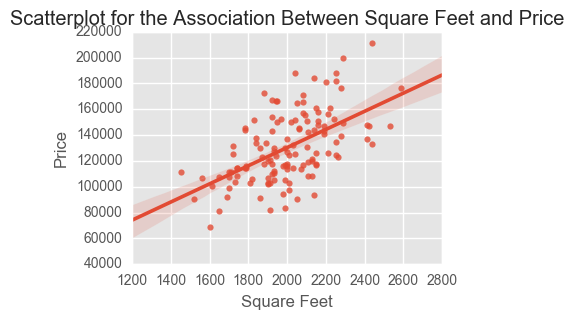

In [48]:
scat1 = sns.regplot(x="sqft", y="price", scatter=True, data=df)

plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title ('Scatterplot for the Association Between Square Feet and Price')
print(scat1)

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [50]:
print ("OLS regression model for the association between urban rate and internet use rate")
# reg1 is the model name , followed by equal sign. In the parantheses 
#write the formula the two quantative variables there is a tilda in between
# and the formula is in quotes

# read for more information
# http://statsmodels.sourceforge.net/devel/example_formulas.html
reg1 = smf.ols('price ~ sqft', data=df).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     55.50
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           1.30e-11
Time:                        18:24:41   Log-Likelihood:                -1463.2
No. Observations:                 128   AIC:                             2930.
Df Residuals:                     126   BIC:                             2936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------

Dep. variable is the name of the response variable

No. of observations show the valid observations

F-statistics is 55.50 and Prob(F-statistics is very small. Hence we can reject the null hypothesis. )

Parameter estimates : Intercept and sqft. therefore

price = -1.009e+04 + 70.22 * sqft

** price = -1.009 * 10 raise to the power of 04 

(e means "times ten to the power of...". 
2.3e-5, means 2.3 times ten to the minus five power, or 0.000023)

p>|t| is the pearson value for explanotory variables... when 0.000 p < 0.001

R-squared value : proportion of the variance. such as 30.6 % variance in the dataset.

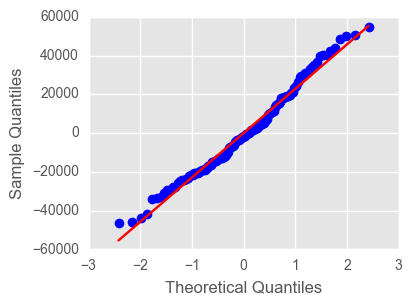

In [53]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

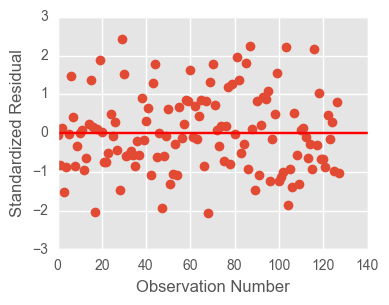

In [55]:
# simple plot of residuals
stdres=pd.DataFrame(reg1.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
